In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-03-02 16:42:21--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.160.112, 216.58.200.240, 172.217.160.80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.160.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  33.1MB/s    in 2.0s    

2021-03-02 16:42:23 (33.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os 
import zipfile 

local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r') 
zip_ref.extractall('/tmp') 
zip_ref.close() 

In [3]:
base_dir='/tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train') 
validation_dir=os.path.join(base_dir,'validation') 

train_cats_dir=os.path.join(train_dir,'cats') 
train_dogs_dir=os.path.join(train_dir,'dogs') 
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [4]:
train_cat_fnames=os.listdir(train_cats_dir) 
print(train_cat_fnames[:10]) 

train_dog_fnames=os.listdir(train_dogs_dir) 
print(train_dog_fnames[:10])

['cat.483.jpg', 'cat.642.jpg', 'cat.892.jpg', 'cat.4.jpg', 'cat.648.jpg', 'cat.256.jpg', 'cat.899.jpg', 'cat.767.jpg', 'cat.500.jpg', 'cat.293.jpg']
['dog.809.jpg', 'dog.157.jpg', 'dog.742.jpg', 'dog.786.jpg', 'dog.561.jpg', 'dog.580.jpg', 'dog.870.jpg', 'dog.799.jpg', 'dog.695.jpg', 'dog.211.jpg']


In [5]:
print('total traininig cat images:',len(os.listdir(train_cats_dir))) 
print('total traininig dog images:',len(os.listdir(train_dogs_dir))) 
print('total validation cat images:',len(os.listdir(validation_cats_dir))) 
print('total validation dog images:',len(os.listdir(validation_dogs_dir))) 

total traininig cat images: 1000
total traininig dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

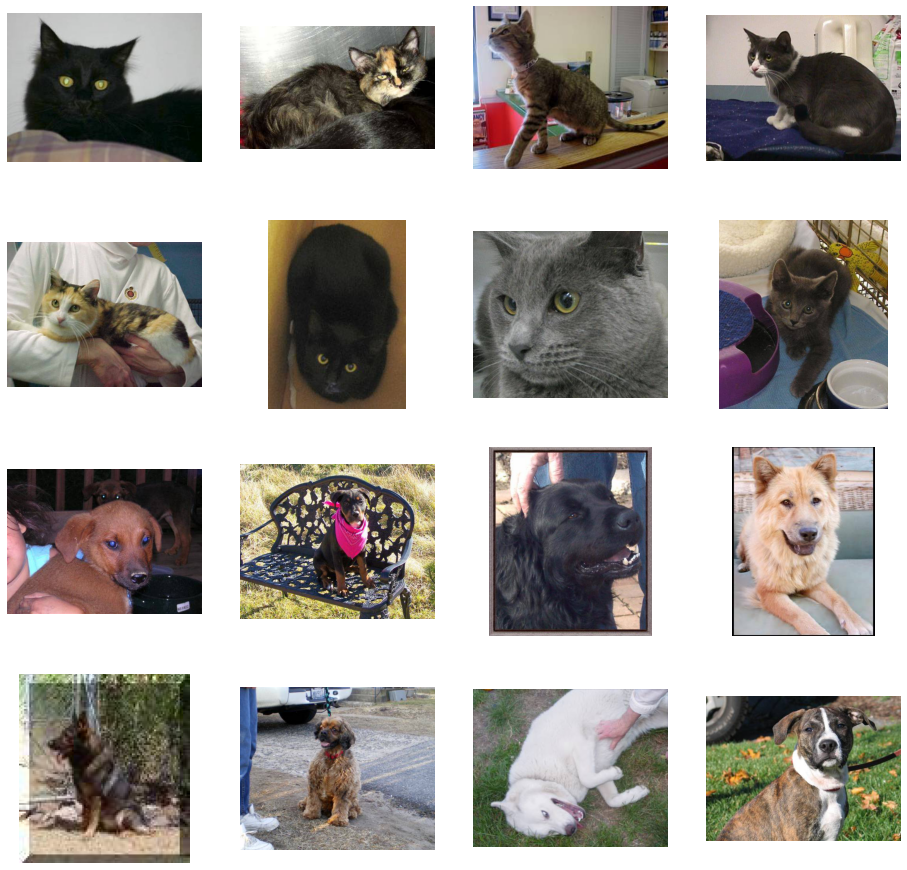

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()



In [8]:
import tensorflow as tf 

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid') 
])

/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dske/anaconda3/envs/gluon/lib/python3.6/site-pack

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0         
__________

In [10]:
from tensorflow.keras.optimizers import RMSprop 
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen=ImageDataGenerator(rescale=1/255)

test_datagen=ImageDataGenerator(rescale=1/255) 

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)


validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
50/50 [==============================] - 3s 54ms/step - loss: 0.6743 - acc: 0.6320
 - 9s - loss: 0.7813 - acc: 0.5580 - val_loss: 0.6743 - val_acc: 0.6320
Epoch 2/40
50/50 [==============================] - 3s 54ms/step - loss: 0.9443 - acc: 0.5250
 - 7s - loss: 0.6661 - acc: 0.6335 - val_loss: 0.9443 - val_acc: 0.5250
Epoch 3/40
50/50 [==============================] - 3s 54ms/step - loss: 0.5910 - acc: 0.6940
 - 7s - loss: 0.5935 - acc: 0.7025 - val_loss: 0.5910 - val_acc: 0.6940
Epoch 4/40
50/50 [==============================] - 3s 54ms/step - loss: 0.5988 - acc: 0.6970
 - 7s - loss: 0.5115 - acc: 0.7540 - val_loss: 0.5988 - val_acc: 0.6970
Epoch 5/40
50/50 [==============================] - 3s 55ms/step - loss: 0.6036 - acc: 0.7220
 - 8s - loss: 0.4323 - acc: 0.8090 - val_loss: 0.6036 - val_acc: 0.7220
Epoch 6/40
50/50 [==============================] - 3s 55ms/step - loss: 0.7001 - acc: 0.7260
 - 8s - loss: 0.3371 - acc: 

In [13]:
import numpy as np 
from keras.preprocessing import image 

for filename in os.listdir(r'./data_cat_dog/'):
    # predicting images
#     path = '/content/' + fn
    path=os.getcwd()+'/data_cat_dog/'+filename
    img=image.load_img(path,target_size=(150,150)) 
    x=image.img_to_array(img) 
    x=np.expand_dims(x,axis=0) 
    images=np.vstack([x]) 
    classes=model.predict(images,batch_size=10) 
    print(classes[0]) 
    if classes[0]>0:
        print(filename+ " is a dog" )
    else:
        print(filename+" is a cat" ) 

[1.]
m2.jpg is a dog
[1.]
m1.jpg is a dog
[1.]
g5.jpg is a dog
[1.]
g1.jpg is a dog
[0.]
m3.jpg is a cat
[1.]
m5.jpg is a dog
[0.]
g2.jpg is a cat
[0.]
m4.jpg is a cat
[1.]
g3.jpg is a dog
[1.]
g4.jpg is a dog


Using TensorFlow backend.


/home/dske/anaconda3/envs/gluon/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


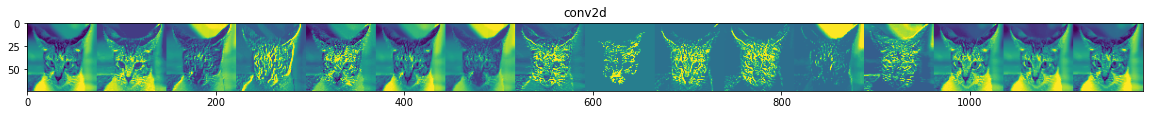

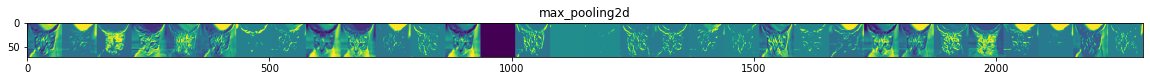

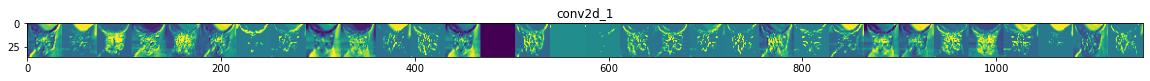

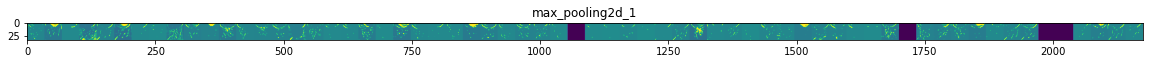

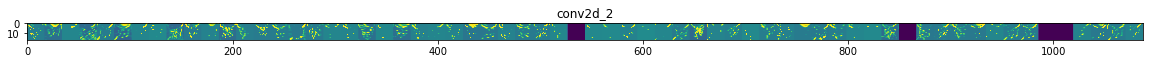

In [14]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training and validation loss')

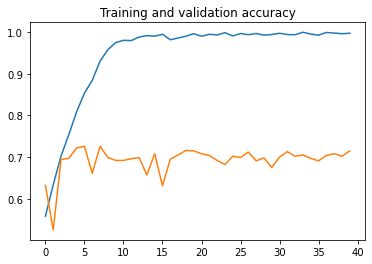

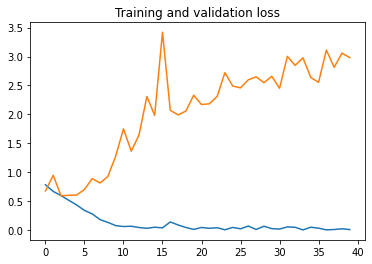

In [15]:
acc=history.history['acc']
val_acc=history.history['val_acc'] 

loss=history.history['loss'] 
val_loss=history.history['val_loss'] 

epochs=range(len(acc)) 

plt.plot(epochs,acc) 
plt.plot(epochs,val_acc) 
plt.title('Training and validation accuracy') 
plt.figure() 

plt.plot(epochs,loss) 
plt.plot(epochs,val_loss) 
plt.title('Training and validation loss') 